2
cx = 399 ; cy = 272


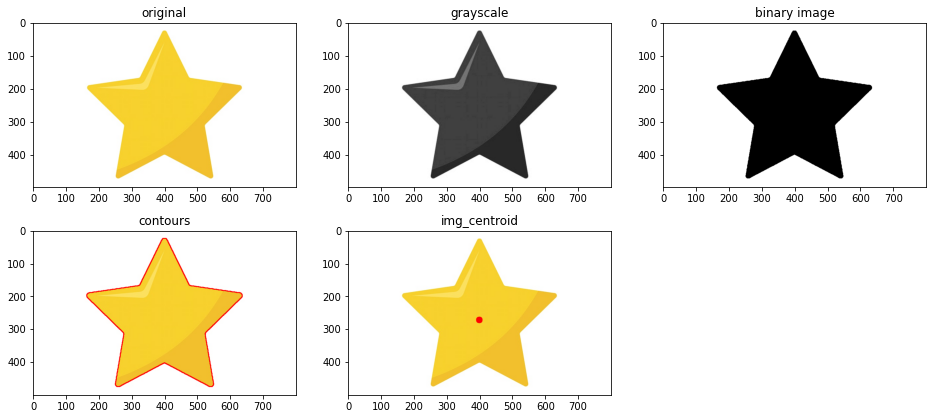

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# read the image
img = cv2.imread('star.jpg')[150:650, :]
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_contours = img.copy()
img_centroid = img.copy()

# Binarize the image
ret, thresh = cv2.threshold(img_gray, 240, 255, cv2.THRESH_BINARY)

# Find the contours
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
print(len(contours))

# Draw the contours
cnt = contours[0]
cv2.drawContours(img_contours, [cnt], -1, (255,0,0), 2)

# Calculate the moments
M = cv2.moments(cnt)

# Calculate area
area = M['m00']
# Calculate centroid
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])
print("cx = {} ; cy = {}".format(cx, cy))

cv2.circle(img_centroid, (cx, cy), 10, (255, 0, 0), -1)

plt.subplot(2,3,1)
plt.title('original')
plt.imshow(img)

plt.subplot(2,3,2)
plt.title('grayscale')
plt.imshow(img_gray, cmap ='gray')

plt.subplot(2,3,3)
plt.title('binary image')
plt.imshow(thresh, cmap ='gray')

plt.subplot(2,3,4)
plt.title('contours')
plt.imshow(img_contours)

plt.subplot(2,3,5)
plt.title('img_centroid')
plt.imshow(img_centroid)

plt.gcf().set_size_inches(16, 7)
plt.show()